# notebook minist and different optimizers

the basis is kaiminig optimization and batchnorm

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
from torch import *

#let me be on my mac
def cuda(self, device=None, non_blocking=False) : return self
torch.Tensor.cuda = cuda

In [3]:
from lib.callbacks import *
from lib.model import *
from lib.data import *
from lib.optimizers import *
from pathlib import Path

## mnist data

In [4]:
x_train,y_train,x_valid,y_valid = get_mnist_data(Path("/Users/kasparlund/.fastai/data/mnist.pkl.gz"))
x_train,x_valid   = normalize_to(x_train,x_valid)

x_train.mean(),x_train.std()

(tensor(-7.6999e-06), tensor(1.))

In [5]:
in_features         = 1
nh,bs,out_features  = 50,512,y_train.max().item()+1
train_ds,valid_ds   = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
train_dl, valid_dl  = ( DataLoader( train_ds, batch_size=bs, shuffle=True), 
                        DataLoader(valid_ds,  batch_size=bs*2) )
data                = DataBunch( train_dl, valid_dl )
print(len(train_dl))

98


In [6]:
mnist_view   = view_tfm(1,28,28)
layers_sizes = [8,16,32,32]
loss_func    = F.cross_entropy
sched        = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 
cbfs         = [TrainableModelCallback, TrainEvalCallback, OptimizerCallback, 
                partial(ParamScheduler, 'lr', sched),
                partial(BatchTransformXCallback, tfm = mnist_view), 
                Recorder, partial(AvgStatsCallback,[accuracy]),
                ProgressCallback]

## steppers=[sgd_step]

In [7]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=sgd_opt(model.parameters(),lr=0.4, wd=0.01), cb_funcs=cbfs)
%time learn.fit(1)

train: [0.70002609375, tensor(0.8031)]
valid: [0.18852314453125, tensor(0.9508)]
CPU times: user 28 s, sys: 6.16 s, total: 34.2 s
Wall time: 5.22 s


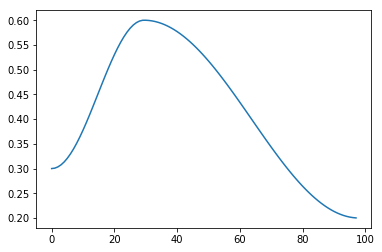

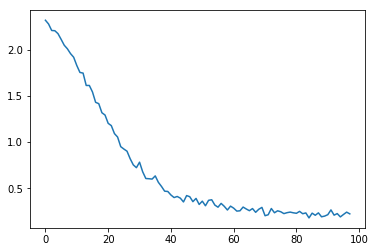

(None, None)

In [8]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## steppers=[weight_decay, sgd_step]

In [9]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
#opt = sgd_wd_opt(model.parameters(),lr=0.4, wd=0.01)
#print(opt.hypers[0]['lr']), print(opt.hypers[0]['wd'])
learn = Learner( model, data, loss_func=F.cross_entropy, opt=sgd_wd_opt(model.parameters(),lr=0.4, wd=0.01), 
                cb_funcs=cbfs)
%time learn.fit(1)

train: [0.726190546875, tensor(0.8053)]
valid: [0.2233755126953125, tensor(0.9601)]
CPU times: user 27.9 s, sys: 5.92 s, total: 33.8 s
Wall time: 5.17 s


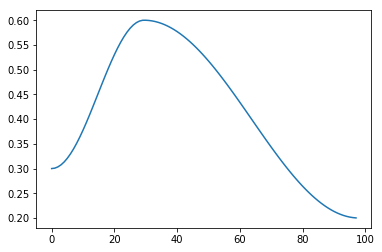

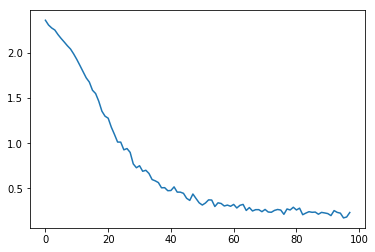

(None, None)

In [10]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## steppers=[weight_decay, sgd_step, l2_reg]

In [11]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=sgd_wd_l2_opt(model.parameters(),lr=0.4), cb_funcs=cbfs)
%time learn.fit(1)

train: [0.689906328125, tensor(0.8171)]
valid: [0.23016748046875, tensor(0.9599)]
CPU times: user 30 s, sys: 8.54 s, total: 38.5 s
Wall time: 6.27 s


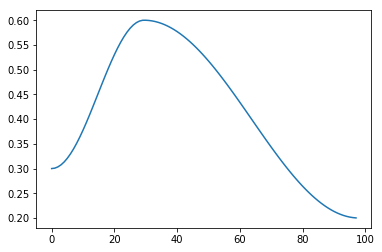

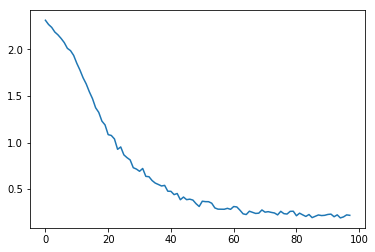

(None, None)

In [12]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## momentum: steppers=[momentum_step,weight_decay]

In [13]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=sgd_mom_wd_opt(model.parameters(),lr=0.3), cb_funcs=cbfs)
%time learn.fit(1)

train: [0.3802309375, tensor(0.8842)]
valid: [0.0795634521484375, tensor(0.9800)]
CPU times: user 28.3 s, sys: 7.03 s, total: 35.3 s
Wall time: 5.59 s


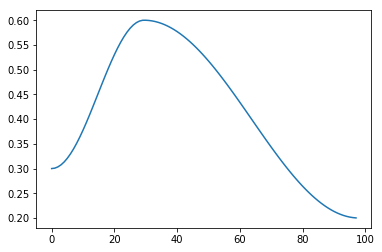

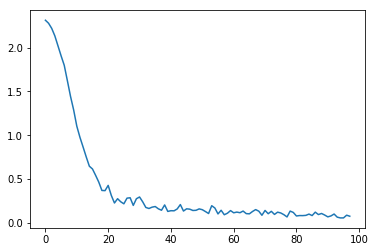

(None, None)

In [14]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## Adam: steppers=[adam_step]

In [15]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=adam_opt(model.parameters(),lr=0.001), cb_funcs=cbfs)
%time learn.fit(1)

train: [0.355806171875, tensor(0.8884)]
valid: [0.08804034423828125, tensor(0.9731)]
CPU times: user 30.3 s, sys: 8.72 s, total: 39 s
Wall time: 6.32 s


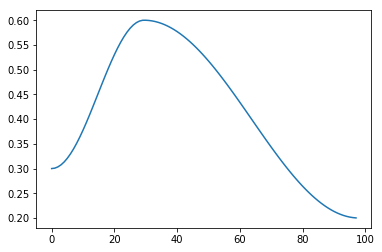

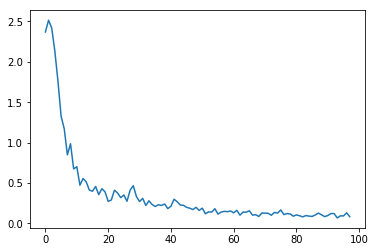

(None, None)

In [16]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## LAMB: steppers=[lamb_step]

In [17]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=lamb(model.parameters(),lr=0.003), cb_funcs=cbfs)
%time learn.fit(1)

train: [1.892085, tensor(0.8408)]
valid: [0.3181161376953125, tensor(0.9506)]
CPU times: user 30.3 s, sys: 7.97 s, total: 38.3 s
Wall time: 6.07 s


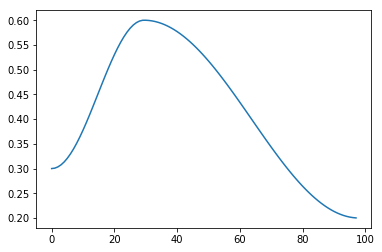

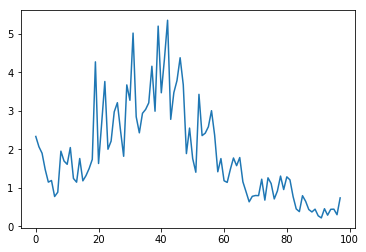

(None, None)

In [18]:
learn.find_subcription_by_cls(Recorder).plot_lr(),plt.show()
learn.find_subcription_by_cls(Recorder).plot_loss(),plt.show()

## mnist with adam and hooks

train: [0.3801798046875, tensor(0.8798)]
valid: [0.1086686279296875, tensor(0.9671)]


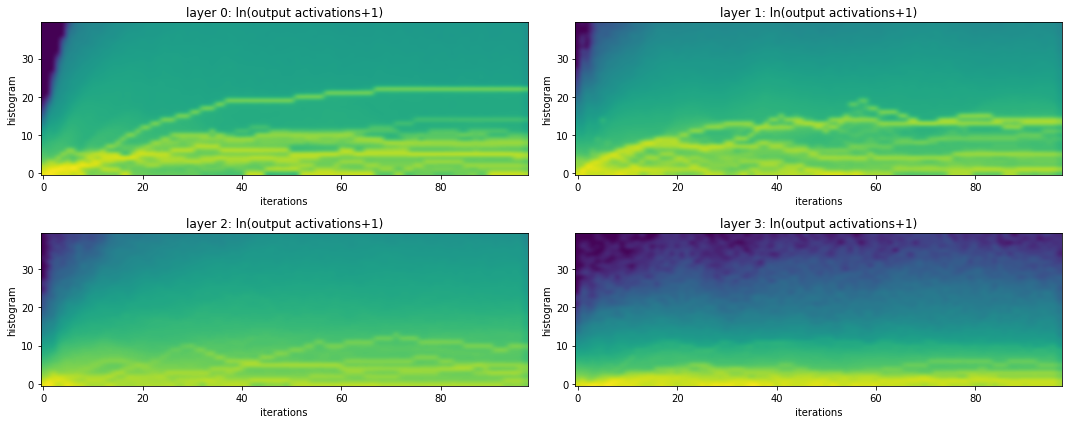

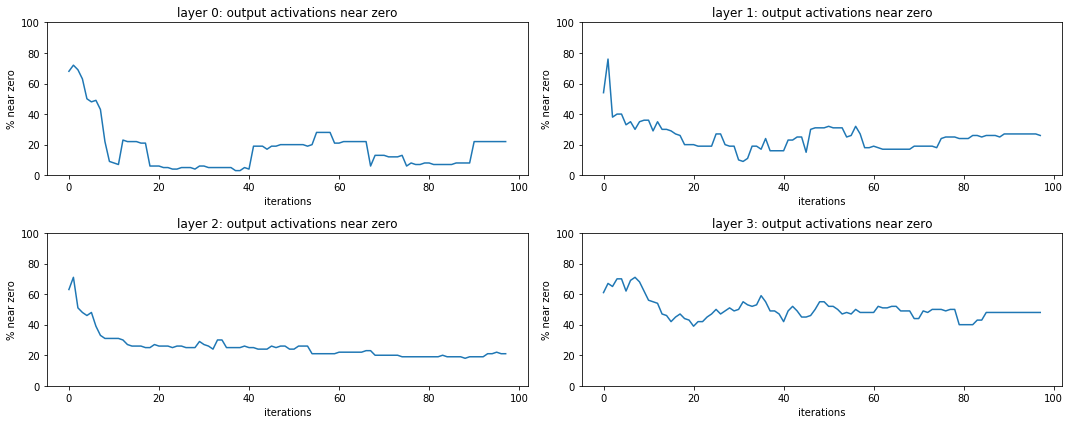

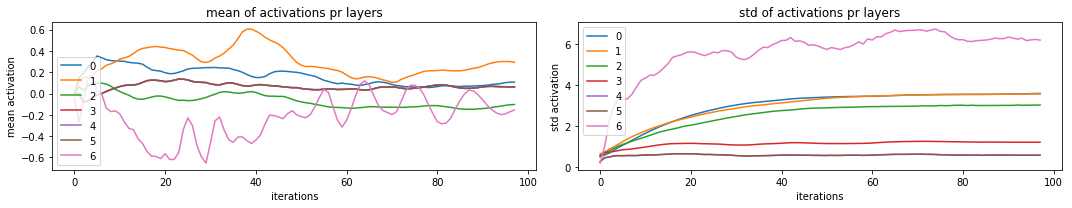

In [19]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=adam_opt(model.parameters(),lr=0.001), cb_funcs=cbfs)
with Hooks(model, append_stats) as hooks: 
    learn.fit(1)
    plot_layer_stats( hooks )

## mnist with LAMB and hooks

train: [2.0344559375, tensor(0.8394)]
valid: [0.3684835693359375, tensor(0.9464)]


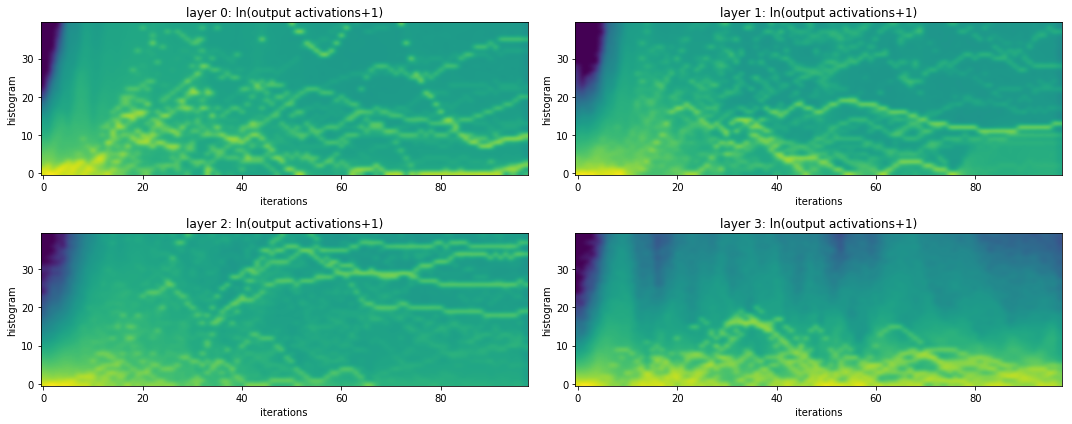

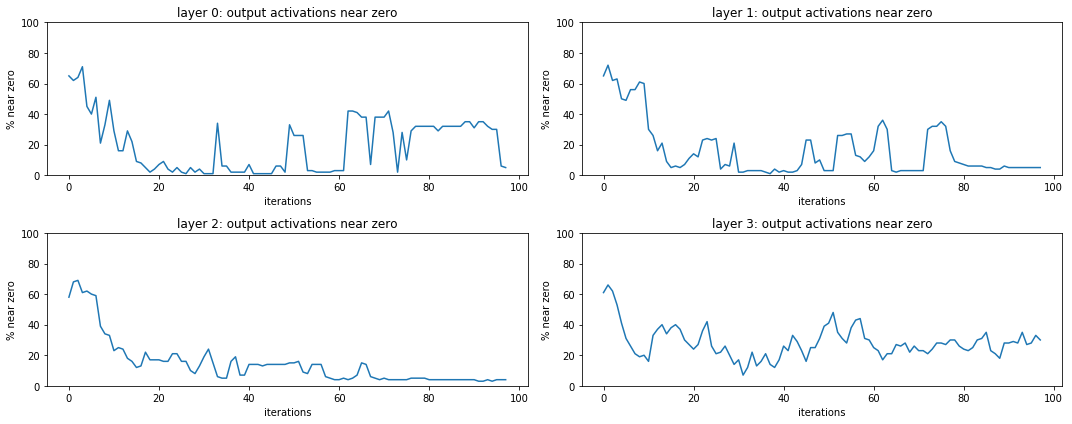

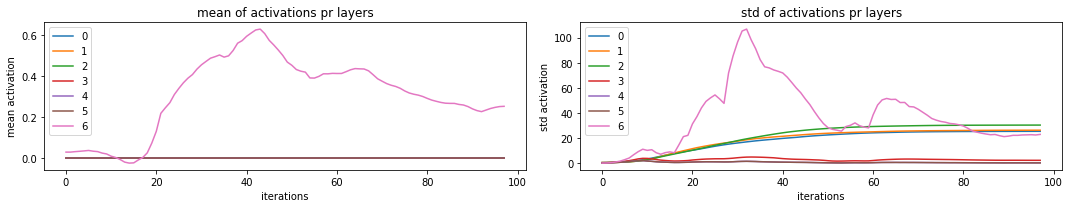

In [20]:
model = get_cnn_model(layers_sizes, in_features, out_features, conv_layer )
init_cnn( model )
learn = Learner( model, data, loss_func=F.cross_entropy, opt=lamb(model.parameters(),lr=0.001), cb_funcs=cbfs)
with Hooks(model, append_stats) as hooks: 
    learn.fit(1)
    plot_layer_stats( hooks )